### **Project 2 : Time Series**

### **Nama : Fakhrur Novianto**

### **Asal : Tangerang**

### **Data : Austin Weather**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Model
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential

# Preprocessing
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

In [ ]:
#! gdown --id 1fJ7wBPpc55PXxL2sAExWnAltNS9E1mYp

In [ ]:
#data_awal_1 = pd.read_csv('/content/smoke_detection_iot.csv')
data_awal_1 = pd.read_csv('austin_weather.csv')
data_awal_1.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [ ]:
data_awal_1 = data_awal_1.dropna()

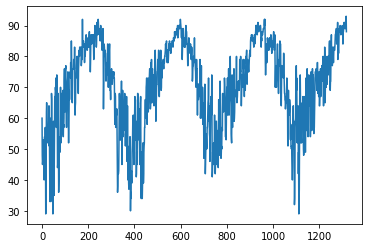

In [ ]:
import matplotlib.pyplot as plt

target = 'TempAvgF'

plt.plot(data_awal_1[target].values)

In [ ]:
data_awal_1.isnull().sum()

Date                          0
TempHighF                     0
TempAvgF                      0
TempLowF                      0
DewPointHighF                 0
DewPointAvgF                  0
DewPointLowF                  0
HumidityHighPercent           0
HumidityAvgPercent            0
HumidityLowPercent            0
SeaLevelPressureHighInches    0
SeaLevelPressureAvgInches     0
SeaLevelPressureLowInches     0
VisibilityHighMiles           0
VisibilityAvgMiles            0
VisibilityLowMiles            0
WindHighMPH                   0
WindAvgMPH                    0
WindGustMPH                   0
PrecipitationSumInches        0
Events                        0
dtype: int64

In [ ]:
data_awal_1.count()

Date                          1319
TempHighF                     1319
TempAvgF                      1319
TempLowF                      1319
DewPointHighF                 1319
DewPointAvgF                  1319
DewPointLowF                  1319
HumidityHighPercent           1319
HumidityAvgPercent            1319
HumidityLowPercent            1319
SeaLevelPressureHighInches    1319
SeaLevelPressureAvgInches     1319
SeaLevelPressureLowInches     1319
VisibilityHighMiles           1319
VisibilityAvgMiles            1319
VisibilityLowMiles            1319
WindHighMPH                   1319
WindAvgMPH                    1319
WindGustMPH                   1319
PrecipitationSumInches        1319
Events                        1319
dtype: int64

In [ ]:
data_awal_1.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [ ]:
data_awal_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [ ]:
data_awal_1[target] = data_awal_1[target].astype(np.float64)

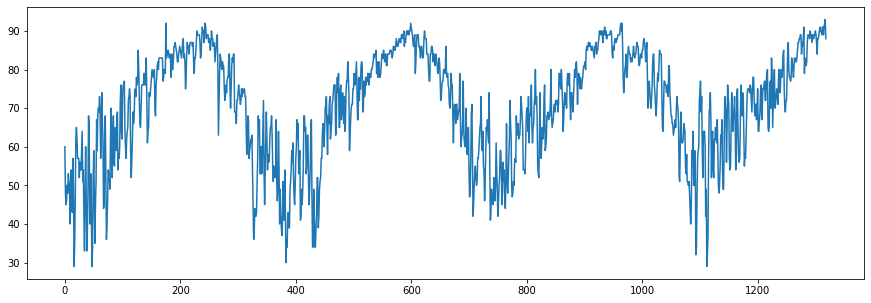

In [ ]:
import matplotlib.pyplot as plt

waktu = data_awal_1['Date'].values
data = data_awal_1[target].values


plt.figure(figsize = (15,5))
plt.plot(data)

In [ ]:
data

array([60., 48., 45., ..., 92., 93., 88.])

In [ ]:
def bagi(series, window_size, batch_size, shuffle_buffer):
  series = tf.expand_dims(series, axis = -1)
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size + 1, shift = 1, drop_remainder =True)
  ds = ds.flat_map(lambda w: w.batch(window_size + 1))
  ds = ds.shuffle(shuffle_buffer)
  ds = ds.map(lambda w: (w[:-1], w[-1:]))
  return ds.batch(batch_size).prefetch(1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, waktu, test_size = 0.2, random_state = 0 , shuffle=False)


In [ ]:
data_train = bagi(x_train, window_size = 60, batch_size = 100, shuffle_buffer = 1000)

data_test = bagi(x_test, window_size=60, batch_size=100, shuffle_buffer= 1000)

In [ ]:
# Model


# LSTM --> untuk memcahkan masalah machine translation, speech recognation

# Apabila pakai 2 layer LSTM, layer pertama harus pakai return_sequences bernilai True

from keras.layers import Dense, LSTM, Dropout
from keras.models import Sequential

model = Sequential([LSTM(60, return_sequences = True),
                    LSTM(60),
                    Dense(30, activation = 'relu'),
                    #Dropout(0.5),
                    Dense(10, activation = 'relu'),
                    Dense(1)])

In [ ]:
max = data_awal_1[target].max()
print('Nilai Maksimal : ' )
print(max)


min = data_awal_1[target].min()
print('Nilai Mininmal : ' )
print(min)

th_mae = (max-min)*10/100
print(th_mae)

Nilai Maksimal : 
93.0
Nilai Mininmal : 
29.0
6.4


In [ ]:
class batas(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< th_mae):
      self.model.stop_training = True
      print("\nNilai MAE sudah dibawah Treshold")
callbacks = batas()

In [ ]:
from keras.optimizers import SGD
from keras.losses import Huber

optimizer = SGD(lr=1.0000e-04, momentum=0.9)

model.compile(loss = Huber(),
              optimizer = optimizer,
              metrics = ['mae'])

history = model.fit(data_train, validation_data = data_test, epochs = 100, callbacks = [callbacks])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


10/10 [==============================] - 5s 113ms/step - loss: 71.6359 - mae: 72.1359 - val_loss: 73.9707 - val_mae: 74.4707
Epoch 2/100
10/10 [==============================] - 0s 21ms/step - loss: 71.4937 - mae: 71.9937 - val_loss: 73.7569 - val_mae: 74.2569
Epoch 3/100
10/10 [==============================] - 0s 23ms/step - loss: 71.3469 - mae: 71.8469 - val_loss: 73.7008 - val_mae: 74.2008
Epoch 4/100
10/10 [==============================] - 0s 22ms/step - loss: 71.2912 - mae: 71.7912 - val_loss: 73.6465 - val_mae: 74.1465
Epoch 5/100
10/10 [==============================] - 0s 22ms/step - loss: 71.2393 - mae: 71.7393 - val_loss: 73.5967 - val_mae: 74.0967
Epoch 6/100
10/10 [==============================] - 0s 22ms/step - loss: 71.1912 - mae: 71.6912 - val_loss: 73.5491 - val_mae: 74.0491
Epoch 7/100
10/10 [==============================] - 0s 23ms/step - loss: 71.1448 - mae: 71.6448 - val_loss: 73.5034 - val_mae: 74.0034
Epoch 8/100
10/10 [==============================] - 0s 23m

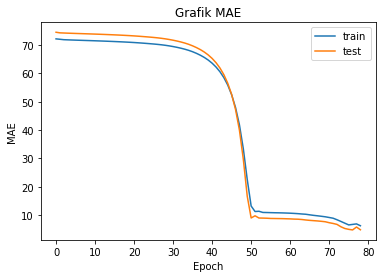

In [ ]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Grafik MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

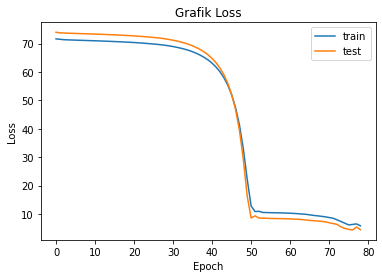

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Grafik Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()